In [1]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
# Hodnoty atributů datového vzorku a cílové promˇenné
data = np.array([[1,1],[1,2],[2,3],[3,2],[2,3],
[2,3],[2,2],[3,1],[3,3],[1,3]])
target = np.array([1,1,1,1,1,0,0,0,0,0])
# Inicializace a nauˇcení modelu
model = MultinomialNB()
model.fit(data, target)
# Použití modelu pro nový vzorek
prediction = model.predict(np.array([1, 3]).reshape(1, -1))
print(prediction)

[1]


In [2]:
import pandas as pd
sms = pd.read_csv('SMSSpamCollection', encoding='utf-8', sep = '\t',
names=['label','message'])
sms.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [3]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [4]:
sms['length'] = sms['message'].apply(len)
sms.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

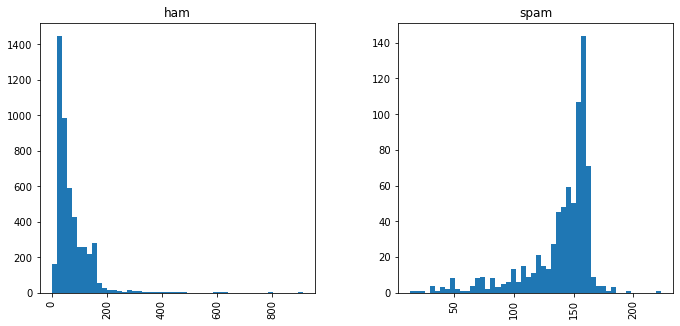

In [5]:
import matplotlib.pyplot as plt
sms.hist(column='length', by='label', bins=50,figsize=(11,5))
plt.show()

In [6]:
import nltk
#nltk.download()

In [8]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
import re
def preprocess_stop(text):
    tokens = [token.lower() for token in re.findall('\w+', text) if token not in stopwords.words('english')]
    return " ".join(tokens)

In [10]:
sms['message'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [12]:
preprocess_stop(sms['message'][6])

'even brother like speak they treat like aids patent'

In [13]:
result = sms['message'].apply(preprocess_stop)
result

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                nah i think goes usf lives around though
                              ...                        
5567    this 2nd time tried 2 contact u u 750 pound pr...
5568                     will ü b going esplanade fr home
5569                             pity mood so suggestions
5570    the guy bitching i acted like interested buyin...
5571                                   rofl its true name
Name: message, Length: 5572, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer("english")
X = vectorizer.fit_transform(result)
X

c:\Users\tomas\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=english as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<5572x8692 sparse matrix of type '<class 'numpy.float64'>'
	with 51812 stored elements in Compressed Sparse Row format>

In [15]:
print(X)

  (0, 8304)	0.19367133232870914
  (0, 1080)	0.34662215358656684
  (0, 3607)	0.16249778391503625
  (0, 2057)	0.2928277960456836
  (0, 1761)	0.3308883126306653
  (0, 4489)	0.2928277960456836
  (0, 8527)	0.23446293536343882
  (0, 3647)	0.1914742686221826
  (0, 1763)	0.2928277960456836
  (0, 1313)	0.2592620666240387
  (0, 2333)	0.2684349975703689
  (0, 5942)	0.2711122263759042
  (0, 4362)	0.34662215358656684
  (0, 3563)	0.15700111684745632
  (1, 5553)	0.5466243141314314
  (1, 8429)	0.43162957585464123
  (1, 4330)	0.5236804332035243
  (1, 4525)	0.4083258549263009
  (1, 5524)	0.2718944069420321
  (2, 77)	0.23481398547774926
  (2, 1167)	0.16878205227806695
  (2, 6268)	0.16878205227806695
  (2, 7966)	0.12429583820628914
  (2, 7262)	0.1966389668741482
  (2, 6216)	0.1787234410397601
  :	:
  (5568, 3576)	0.3299850041793482
  (5568, 8439)	0.42335817127172604
  (5568, 3914)	0.33086288179759665
  (5569, 7404)	0.5800032287379318
  (5569, 5873)	0.5800032287379318
  (5569, 5147)	0.4823412435178001
  (5

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, sms['label'],test_size=0.3, random_state=24)

In [17]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train, Y_train)

MultinomialNB(alpha=0.1)

In [19]:
mnb_predictions = mnb.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report
mnbs = accuracy_score(Y_test, mnb_predictions)
print(mnbs)
print(classification_report(Y_test, mnb_predictions))

0.9826555023923444
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1455
        spam       0.94      0.92      0.93       217

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split=10, random_state=24)
dtc.fit(X_train, Y_train)
dtc_predictions = dtc.predict(X_test)
dtcs = accuracy_score(Y_test, dtc_predictions)
dtcs

0.9712918660287081

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=49)
knc.fit(X_train, Y_train)
knc_predictions = knc.predict(X_test)
kncs = accuracy_score(Y_test, knc_predictions)
kncs

0.9336124401913876

In [25]:
items = [('Bayes', [mnbs]), ('Tree', [dtcs]), ('KNN', [kncs])]
df = pd.DataFrame.from_dict(dict(items), orient='index', columns=['Score'])
print(df)

          Score
Bayes  0.982656
Tree   0.971292
KNN    0.933612


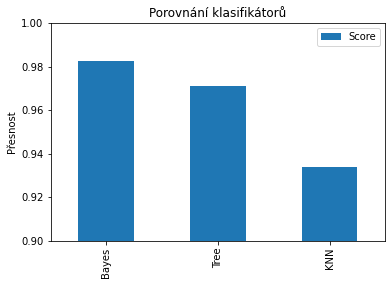

In [26]:
df.plot(kind='bar', ylim=(0.9,1.0), align='center')
plt.xticks(np.arange(3),df.index)
plt.ylabel('Přesnost')
plt.title('Porovnání klasifikátorů')
plt.show()